# Exploring Statistical Measures
## Penguins Data
---

### Setting a default style theme

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style for visualizations
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False
}

sns.set_theme(style = 'ticks', palette = 'Set2', font = 'Arial', rc = custom_params)

### Importing the data

In [2]:
# Load the Penguins example dataset into a dataframe
df_raw = sns.load_dataset('penguins')

# Make a new copy of df_raw (called df) for cleaning/transformation
df = df_raw.copy()

# Get summary info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


---

### 1. Run the describe method on the penguins dataset. Which number is larger: the mean body mass or the median body mass?

In [3]:
# Declare df_stats and assign it the evaluated result of the describe method
df_stats = df.describe()
df_stats

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


***Note:*** In the `df_stats` dataframe above, row index '50%' represents the median.

In [4]:
# Get mean body mass (mean_bm) and median body mass (median_bm)
mean_bm = df_stats.loc['mean', 'body_mass_g']
median_bm = df_stats.loc['50%', 'body_mass_g']

print(f"The mean body mass is: {round(mean_bm, 2)} g")
print(f"The median body mass is: {round(median_bm, 2)} g")

The mean body mass is: 4201.75 g
The median body mass is: 4050.0 g


In [5]:
# Compare mean_bm and median_bm to find the larger num, and assign to larger_num
bm_dict = {mean_bm: 'mean', median_bm: 'median'}
larger_num = mean_bm if mean_bm > median_bm else median_bm

print(f"The larger number is: {round(larger_num, 2)} g (the {bm_dict[larger_num]})")

The larger number is: 4201.75 g (the mean)


---

### 2. Write code to display only the maximum value of each column.

In [6]:
df_stats.loc['max']

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
Name: max, dtype: float64

In [7]:
# Alternatively, we can use the max method with the original dataframe (df)
df.max(numeric_only = True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

---

### 3. Run value_counts() on the species column. Which species is the most common?

In [8]:
# IMPORTANT: The value_counts method, by default, drops NaN values.  NaNs in the species column won't be counted.
species_counts = df.value_counts('species')
species_counts

species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64

In [9]:
most_common_species = species_counts.idxmax()

print(f"The most common species is: {most_common_species}")
print(f"There are {species_counts[most_common_species]} data points for {most_common_species} in this dataset.")

The most common species is: Adelie
There are 152 data points for Adelie in this dataset.


---

### 4. Write code to find the 90th percentile of body mass. Translate the result into a sentence.

In [10]:
# Reassign df_stats to the evaluated result of the describe method with modified percentiles
df_stats = df.describe(percentiles = [0.25, 0.50, 0.75, 0.90])
df_stats

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
90%,50.800000,19.500000,220.900000,5400.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
# From the df_stats, only pull data from the 'body_mass_g' column and row index '90%'
bm_90th_percentile = df_stats.loc['90%', 'body_mass_g']

print(f"The 90th percentile of body mass is: {round(bm_90th_percentile, 2)} g")

The 90th percentile of body mass is: 5400.0 g


---

### 5. Write code to group by species and find the median of all quantitative columns for each species. Based on these results, which species has the shortest median bill depth?

In [12]:
# Group by species
species_groups = df.groupby('species')

# Get descriptive statistics for bill_depth_mm and assign to species_stats
species_stats = species_groups.describe()

# From the species_stats dataframe, only pull data from the column 'bill_depth_mm' (first level), '50%' (second level) 
# NOTE: The 50% percentile represents the median
# Assign this subset of data to the variable species_medians
species_medians = species_stats['bill_depth_mm']['50%']
species_medians

species
Adelie       18.40
Chinstrap    18.45
Gentoo       15.00
Name: 50%, dtype: float64

In [13]:
# Alternatively, we can get the same data using the pivot_table method on the original dataframe (df)
df.pivot_table('bill_depth_mm', columns = 'species', aggfunc = 'median')

species,Adelie,Chinstrap,Gentoo
bill_depth_mm,18.4,18.45,15.0


In [14]:
shortest_median = species_medians.idxmin()

print(f"The species with the shortest median bill depth is: {shortest_median}")
print(f"{shortest_median} has a median bill depth of: {species_medians[shortest_median]} mm")

The species with the shortest median bill depth is: Gentoo
Gentoo has a median bill depth of: 15.0 mm


---

### 6. Create a kdeplot for the flipper length variable. Approximately (round to a multiple of 10), what is the most common value for this variable?

In [15]:
# Find the most common value in the 'flipper_length_mm' column and assign it to mode
mode = int(df['flipper_length_mm'].mode())

print(f"The most common value for flipper length is: {mode} mm")

The most common value for flipper length is: 190 mm


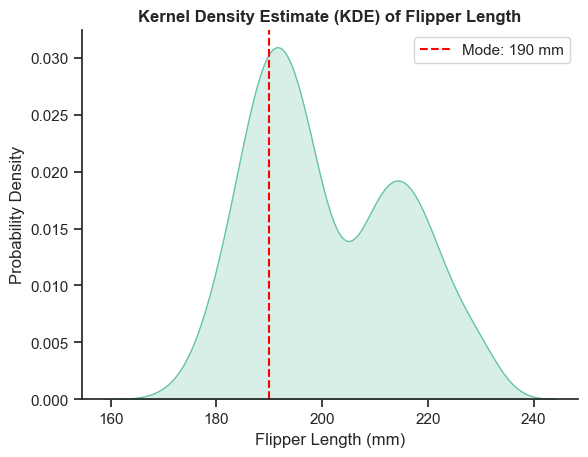

In [16]:
# Create the KDE plot
sns.kdeplot(df, x = 'flipper_length_mm', fill = True)

plt.title('Kernel Density Estimate (KDE) of Flipper Length', fontweight = 'bold')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Probability Density')
plt.axvline(mode, color = 'red', linestyle = 'dashed', label = f"Mode: {mode} mm")
plt.legend()

plt.show()

---